## PANDA
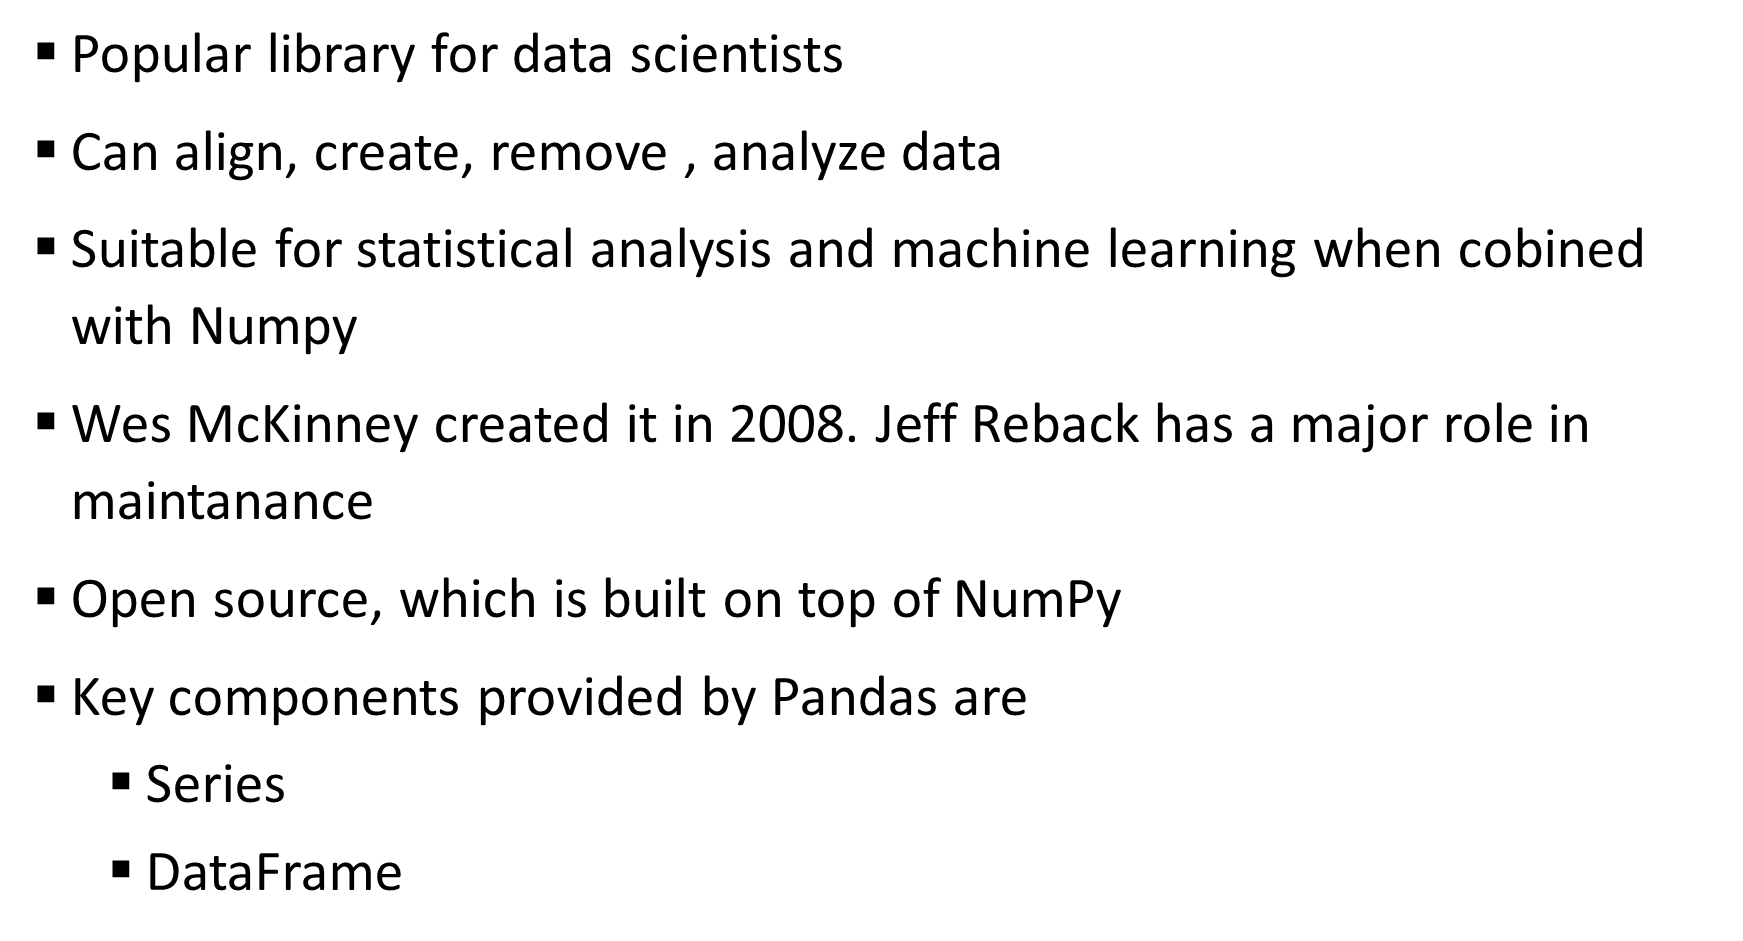

In [2]:
import pandas as pd 
import numpy as np
#create series data
obj1=pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(obj1.index)
print(obj1.values)
print(obj1)
#supports string indexing
print(obj1['b'])
# supports boolean indexing
print(obj1[obj1>0])


Index(['d', 'b', 'a', 'c'], dtype='object')
[ 4  7 -5  3]
d    4
b    7
a   -5
c    3
dtype: int64
7
d    4
b    7
c    3
dtype: int64


In [3]:
display(obj1)

d    4
b    7
a   -5
c    3
dtype: int64

In [4]:
obj2 = pd.Series({'a': 10, 'b': 5, 'c': 30})
print(obj2)
obj3 = pd.Series({'a': 40, 'b': 50, 'c': 60})
# auto alignment
print(obj3+obj2)
#change index
obj2.index=[1,2,3]
print(obj2)


a    10
b     5
c    30
dtype: int64
a    50
b    55
c    90
dtype: int64
1    10
2     5
3    30
dtype: int64


In [6]:
import pandas as pd 
import numpy as np
#create dataframes
d = {'one': pd.Series ([1 , 2 , 3],index=['a','b','c']),\
     'two': pd.Series ([1 , 2 , 3, 4.0],index=['a','b','c','d'])}
df1=pd.DataFrame(d)
print(df1)
names=['tom', 'pacino','lewis','vin','adam']
weights=[65,78,90,85,81]
actordata=list(zip(names,weights))
df2=pd.DataFrame(data = actordata,columns=['Names','weights'])
print(df2)
print(df2.head(3))
print(df2.tail(3))


   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
    Names  weights
0     tom       65
1  pacino       78
2   lewis       90
3     vin       85
4    adam       81
    Names  weights
0     tom       65
1  pacino       78
2   lewis       90
   Names  weights
2  lewis       90
3    vin       85
4   adam       81


In [7]:
display(df2)

,Names,weights
0,tom,65
1,pacino,78
2,lewis,90
3,vin,85
4,adam,81


In [8]:
#store data into a csv file
df2.to_csv ('acdata.csv', index = False,header = False)
df2.to_csv ('acdata1.csv')
#raed data from csv file
df3=pd.read_csv('acdata1.csv')
print(df3)
df4= pd.read_csv('acdata1.csv',header=None)
print(df4)


   Unnamed: 0   Names  weights
0           0     tom       65
1           1  pacino       78
2           2   lewis       90
3           3     vin       85
4           4    adam       81
     0       1        2
0  NaN   Names  weights
1  0.0     tom       65
2  1.0  pacino       78
3  2.0   lewis       90
4  3.0     vin       85
5  4.0    adam       81


In [9]:
names=['tom', 'pacino','lewis','vin','adam']
weights=[65,78,90,85,81]
actordata=list(zip(names,weights))
df2=pd.DataFrame(data = actordata,columns=['Names','weights'])


In [10]:
print(df2['weights'].max())
print(df2['weights'].min())
print(df2['weights'].mean())
print(df2['weights'].var())
print(df2['weights'].std())


90
65
79.8
88.69999999999999
9.418067742376882


In [11]:
df2['weights'].describe()
#df2['Names'].unique()

count     5.000000
mean     79.800000
std       9.418068
min      65.000000
25%      78.000000
50%      81.000000
75%      85.000000
max      90.000000
Name: weights, dtype: float64

In [12]:
#Add new column
df2['NewCol']='state'
# delete a column
del df2['NewCol']
#assign a new column with entries
df2['height']=[1.6,6.1,5.9,6.3,5.5]
#alter data in columns
df2['height']=df2['height']+0.1

In [13]:
display(df2)

,Names,weights,height
0,tom,65,1.7
1,pacino,78,6.2
2,lewis,90,6.0
3,vin,85,6.4
4,adam,81,5.6


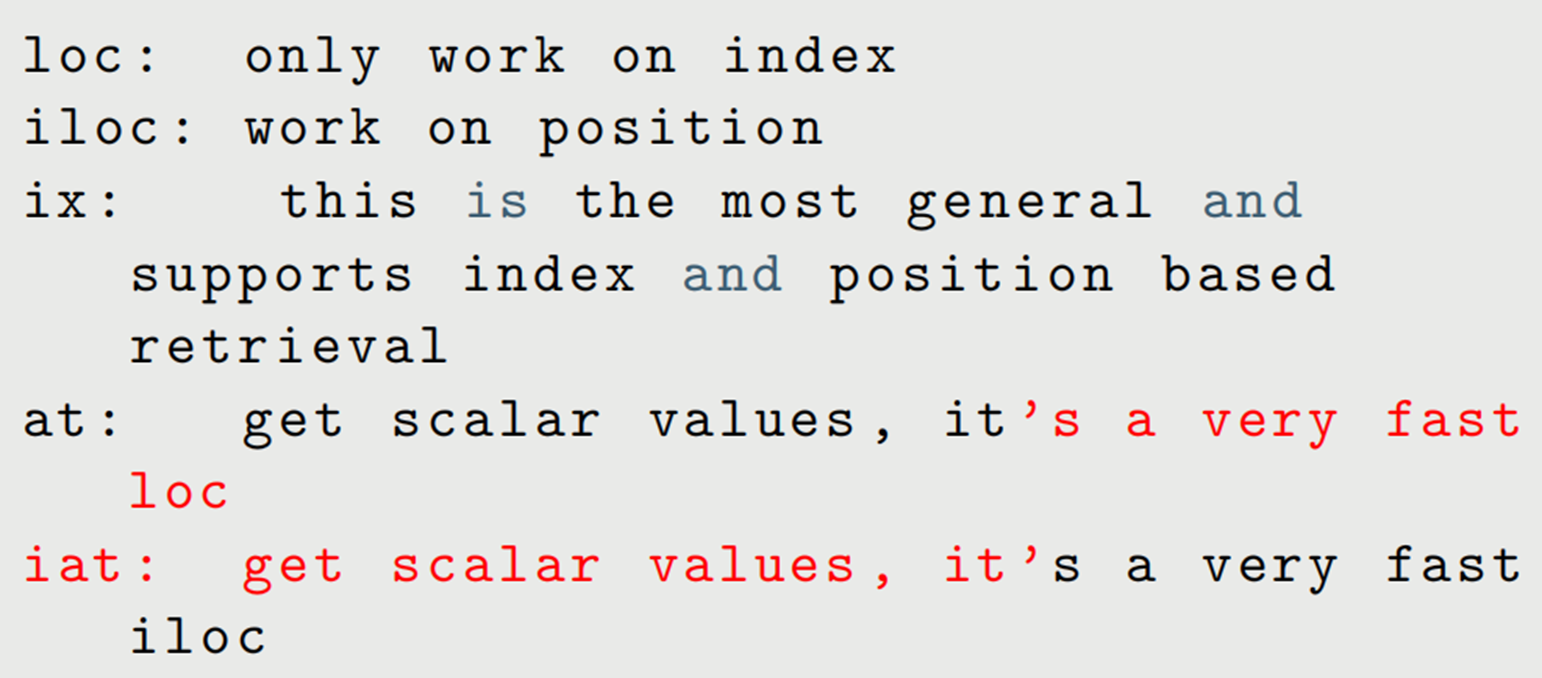

In [12]:
print(df2.loc[2])
print(df2.loc[2:4])
print(df2.loc[2:4,'Names'])
print(df2.loc[2:4,'Names':'weights'])


Names      lewis
weights       90
height       6.0
Name: 2, dtype: object
   Names  weights  height
2  lewis       90     6.0
3    vin       85     6.4
4   adam       81     5.6
2    lewis
3      vin
4     adam
Name: Names, dtype: object
   Names  weights
2  lewis       90
3    vin       85
4   adam       81


In [13]:
display(df2)

,Names,weights,height
0,tom,65,1.7
1,pacino,78,6.2
2,lewis,90,6.0
3,vin,85,6.4
4,adam,81,5.6


In [17]:
#df2.iloc[2]
#df2.iloc[2:5]
#df2.iloc[2:5,1]
df2.iloc[2:5,0:2]


,Names,weights
2,lewis,90
3,vin,85
4,adam,81


In [18]:
df2.iat[1,1]=None
#check the elements in the dataframe for NaN
df2.isnull()
#replace the null element by zero
df2.fillna(0)


,Names,weights,height
0,tom,65.0,1.7
1,pacino,0.0,6.2
2,lewis,90.0,6.0
3,vin,85.0,6.4
4,adam,81.0,5.6


In [20]:
df2.iat[1,1]=None
#replace null by mean of that column
df2.fillna(df2.mean(skipna=True))
#change the original dataframe
#df2=df2.fillna(df2.mean(skipna=True)).copy()


C:\Users\mmray\AppData\Local\Temp/ipykernel_23428/3560683647.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.fillna(df2.mean(skipna=True))


,Names,weights,height
0,tom,65.00,1.7
1,pacino,80.25,6.2
2,lewis,90.00,6.0
3,vin,85.00,6.4
4,adam,81.00,5.6


In [21]:
#write queries
df2.query('weights>85')
df2.query('weights>=85')
df2.query('weights>80 & height>4')
# can be used with lambda function
df2['weights'].apply(lambda x: x-df2['weights'].mean())
#use where functions too
df2.where(df2['weights']>83)


#lookout for merge() anf groupby()


,Names,weights,height
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,lewis,90.0,6.0
3,vin,85.0,6.4
4,NaN,NaN,NaN


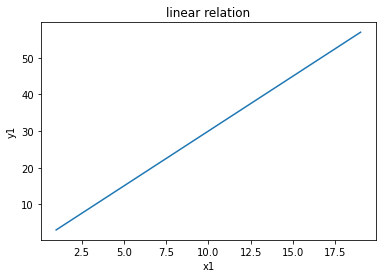

In [22]:
import numpy as ny
from matplotlib import pyplot as pp

x1=ny.arange(1,20)
y1=x1*3
pp.plot(x1,y1)
pp.title('linear relation')
pp.xlabel('x1')
pp.ylabel('y1')
pp.show()


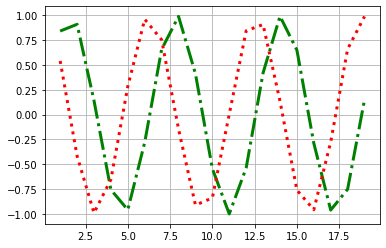

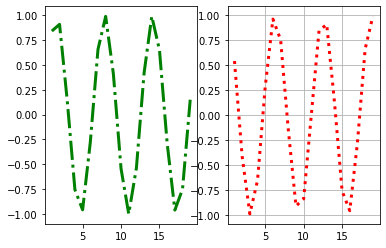

In [23]:
import numpy as ny
from matplotlib import pyplot as pp

x1=ny.arange(1,20)
y2=ny.sin(x1)
y3=ny.cos(x1)
pp.plot(x1,y2,color='g',linestyle='-.', linewidth='3')
pp.plot(x1,y3,color='r',linestyle=':', linewidth='3')
pp.grid(True)
pp.show()
pp.subplot(1,2,1)
pp.plot(x1,y2,color='g',linestyle='-.', linewidth='3')
pp.subplot(1,2,2)
pp.plot(x1,y3,color='r',linestyle=':', linewidth='3')
pp.grid(True)
pp.show()


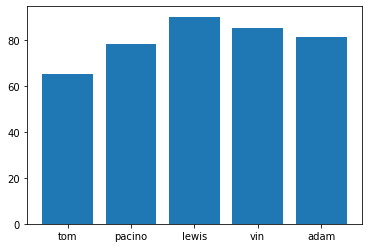

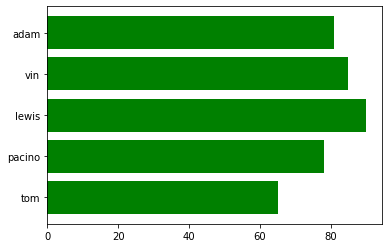

In [24]:
import numpy as ny
import pandas as pd
from matplotlib import pyplot as pp
names=['tom', 'pacino','lewis','vin','adam']
weights=[65,78,90,85,81]
actordata=list(zip(names,weights))
df2=pd.DataFrame(data = actordata,columns=['Names','weights'])
pp.bar(df2.iloc[:,0],df2.iloc[:,1])
pp.show()
pp.barh(df2.iloc[:,0],df2.iloc[:,1],color='g')
pp.show()


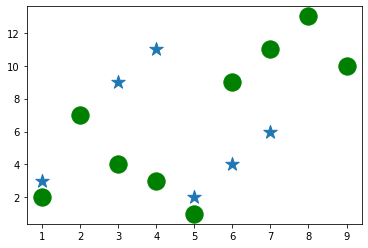

In [25]:
import numpy as ny
import pandas as pd
from matplotlib import pyplot as pp
d = {'one': pd.Series ([3 , 7 , 9, 11, 2, 4, 6, 13, 10],index=[1,2,3,4,5,6,7,8,9]),\
      'two': pd.Series ([2, 7, 4, 3, 1, 9, 11, 13, 10],index=[1,2,3,4,5,6,7,8,9])}
df1=pd.DataFrame(d)
pp.scatter(df1.index,df1.iloc[:,0],marker='*',s=200)
pp.scatter(df1.index,df1.iloc[:,1],c='green',s=300)
pp.show()


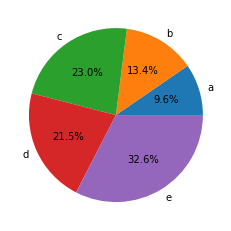

In [27]:
import numpy as ny
import pandas as pd
from matplotlib import pyplot as pp

#csv1=pd.read_csv('csvex2.csv')
#print(csv1.head())
#pp.hist(csv1.iloc[:,1],color='r')
#pp.show()

a1=ny.array(['a','b','c','d','e'])
a2=ny.array([25,35,60,56,85])
pp.pie(a2,labels=a1,autopct='%0.1f%%')
pp.show()


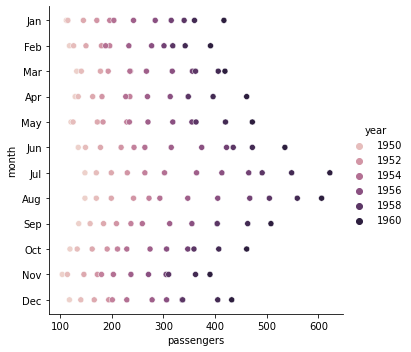

In [29]:
import numpy as ny
import pandas as pd
from matplotlib import pyplot as pp
import seaborn as sn

a=sn.load_dataset('flights')
sn.relplot(x='passengers',y='month',hue='year',data=a)


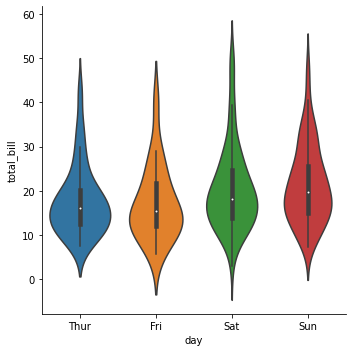

In [33]:
import numpy as ny
import pandas as pd
from matplotlib import pyplot as pp
import seaborn as sn1
b=sn.load_dataset('tips')
sn.catplot(x='day',y='total_bill',kind='violin',data=b)

c=sn.load_dataset('iris')
#sn.scatterplot(x='sepal_length',y='petal_length',hue='species',style='species',data=c)

d=sn.load_dataset('diamonds')
#sn.distplot(d['price'])
